## Data processing

https://www.kaggle.com/competitions/titanic

To read a file csv (exls, ... ), we can use Pandas library.

In [1]:
import pandas as pd

data = pd.read_csv('data/train.csv')

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Use data as matrix

In [3]:
data['Name'][3]

'Futrelle, Mrs. Jacques Heath (Lily May Peel)'

In [4]:
type(data['Survived'][0])

numpy.int64

### Visualization


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

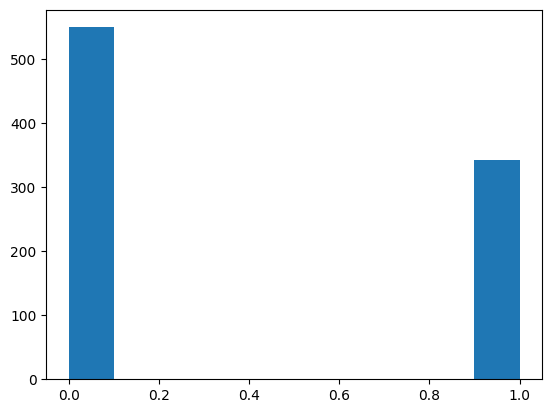

In [5]:
import matplotlib.pyplot as plt

plt.hist(data['Survived'])

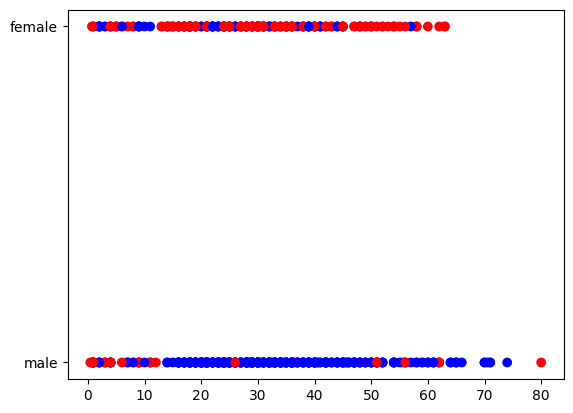

In [6]:
sex = data['Sex']
age = data['Age']
survived = data['Survived']

# plot the data as (sex, age, survived) point
# color the point with survived = 1 as red, survived = 0 as blue

plt.scatter(age, sex, c = survived, cmap = 'bwr')

### Observation?

Sex, Age seems to be the significant information.

## Preprocess Data

In [7]:
data.dropna(subset = ['Age', 'Sex'], inplace = True)

In [8]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [9]:
import numpy as np

sex = data['Sex']
sex = np.array([1 if x == 'male' else 0 for x in sex])
age = np.array(data['Age'])
survived = np.array(data['Survived'])

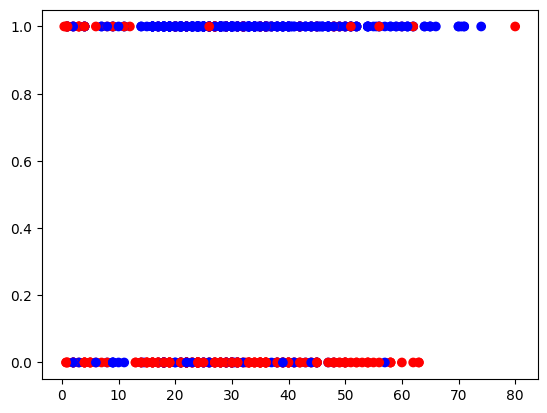

In [10]:
plt.scatter(age, sex, c = survived, cmap = 'bwr')

## Logistic Regression

### Hypothesis

$$
    P(survive | x, y) = \sigma(ax+by+c)
$$

### Loss function

$$L(a,b,c) = \sum_{i = 1}^n (-z_i.ln(\sigma(ax_i + by_i + c)) - (1 - z_i).ln(1 - \sigma(ax_i + by_i +c)))$$

### Derivative

$$ \frac{\partial L}{\partial a} = \sum_{i = 1}^n -x_i(z_i - \sigma(ax_i + by_i + c))$$


$$
\frac{\partial L}{\partial b} = \sum_{i = 1}^n -y_i(z_i - \sigma(ax_i + by_i + c))
$$

$$
\frac{\partial L}{\partial c} = \sum_{i = 1}^n - (z_i - \sigma(ax_i + by_i + c))
$$

### Implementation

In [11]:
class LossFunction:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def value(self, a, b, c):
        predictions = self.sigmoid(a * self.x + b * self.y + c)
        loss_values = -self.z * np.log(predictions) - (1 - self.z) * np.log(1 - predictions)
        return np.nansum(loss_values)
    
    def accuracy(self, a, b, c):
        predictions = self.sigmoid(a * self.x + b * self.y + c)
        predictions = np.array([1 if x > 0.5 else 0 for x in predictions])
        return np.sum(predictions == self.z) / len(self.z)
    
    def derivative(self, a, b, c):
        predictions = self.sigmoid(a * self.x + b * self.y + c)
        common_factor = - (self.z - predictions)
        return np.array([np.nansum(common_factor * self.x), np.nansum(common_factor * self.y), np.nansum(common_factor)])
    
func = LossFunction(sex, age, survived)

Iteration 0
Current point: [-0.5     0.      0.0012]
Gradient: [ 78.15368974 684.49439503  11.73198973]
Loss value: 442.1822427036061
Accuracy: 0.7801120448179272
Iteration 1
Current point: [-5.00007815e-01 -6.84494395e-05  1.19882680e-03]
Gradient: [ 78.15368974 684.49439503  11.73198973]
Loss value: 442.13520556831475
Accuracy: 0.623249299719888
Iteration 2
Current point: [-5.00015631e-01 -1.36898879e-04  1.19765360e-03]
Gradient: [ 78.15368974 684.49439503  11.73198973]
Loss value: 442.0890495216044
Accuracy: 0.6106442577030813
Iteration 3
Current point: [-5.00023446e-01 -2.05348319e-04  1.19648040e-03]
Gradient: [ 78.15368974 684.49439503  11.73198973]
Loss value: 442.0437741348411
Accuracy: 0.6092436974789915
Iteration 4
Current point: [-5.00031261e-01 -2.73797758e-04  1.19530720e-03]
Gradient: [ 78.15368974 684.49439503  11.73198973]
Loss value: 441.99937897581503
Accuracy: 0.603641456582633
Iteration 5
Current point: [-5.00039077e-01 -3.42247198e-04  1.19413401e-03]
Gradient: [ 

KeyboardInterrupt: 

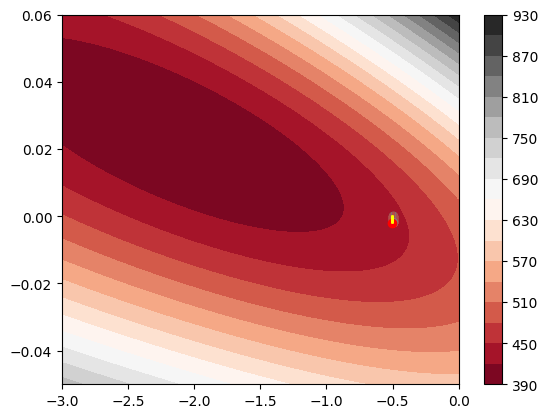

In [12]:
def gradient_descent_process(starting_point, learning_rate, iterations):

    # clear the graphs folder
    import os
    import shutil
    shutil.rmtree('./graphs')
    os.mkdir('./graphs')

    x = np.linspace(-3, 0.001, 100)
    y = np.linspace(-0.05, 0.06, 100)
    X, Y = np.meshgrid(x, y)

    Z = [[func.value(x, y, 0.0012) for x in x] for y in y]

    plt.contourf(X, Y, Z, 20, cmap = 'RdGy')
    plt.colorbar()
    
    cur_point = starting_point
    for i in range(iterations):
        gradient = func.derivative(starting_point[0], starting_point[1], starting_point[2])
        print("Iteration {id}".format(id = i))
        print("Current point: {point}".format(point = cur_point))
        print("Gradient: {grad}".format(grad = gradient))
        print("Loss value: {loss}".format(loss = func.value(cur_point[0], cur_point[1], cur_point[2])))
        print("Accuracy: {acc}".format(acc = func.accuracy(cur_point[0], cur_point[1], cur_point[2])))
        print("====================================")
        next_point = cur_point - gradient * learning_rate

        # plot the current point as grey point, the new point as red
        plt.scatter(cur_point[0], cur_point[1], c = 'grey')
        plt.scatter(next_point[0], next_point[1], c = 'red')
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]], c = 'yellow')
        plt.savefig('./graphs/iteration_{id}.png'.format(id = i))

        cur_point = next_point

        if (np.linalg.norm(gradient) < 0.00001):
            break

    return cur_point

starting_point = np.array([-0.5, 0.00, 0.0012])
learning_rate = 0.0000001
iterations = 100
gradient_descent_process(starting_point, learning_rate, iterations)

### Loss function graph

In [29]:
x = np.linspace(-3, 0.001, 100)
y = np.linspace(-0.05, 0.06, 100)
X, Y = np.meshgrid(x, y)

n_layers = 30
z = np.linspace(-0.1, 0.1, n_layers)

id = 0
import os
import shutil
shutil.rmtree('./loss_graphs')
os.makedirs('./loss_graphs')
for z_value in z:
    Z = [[func.value(x, y, z_value) for x in x] for y in y]

    plt.contourf(X, Y, Z, 100, cmap = 'RdGy')
    # always fix the colorbar to start from 360
    plt.colorbar()
    plt.title('z = {z}'.format(z = z_value))
    plt.savefig('./loss_graphs/loss_{z}.png'.format(z = id))
    plt.clf()
    id += 1
# plt.contourf(X, Y, Z, 20, cmap = 'RdGy')
# plt.colorbar()


<Figure size 640x480 with 0 Axes>

In [30]:
# save all images in ./loss_graphs as a gif
import imageio
import os
images = []
for i in range(n_layers):
    images.append(imageio.imread('./loss_graphs/' + 'loss_{id}.png'.format(id = i)))
imageio.mimsave('./titanic-loss.gif', images)
shutil.rmtree('./loss_graphs')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3200\2113232225.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./loss_graphs/' + 'loss_{id}.png'.format(id = i)))


### Problem arised!

Why is the descent direction always go vertical? Because when calculating gradient, the y-direction is multiply with a large value of $y_i$. The age is always big (at least 20, 30 for example). But other values like $x_i$ is only 0 and 1. Therefore, other direction became insignificant

### Solution: Normalization

In [34]:
# normalize age between 0 and 1
age = np.array(data['Age'])
age = (age - np.min(age)) / (np.max(age) - np.min(age))
print(pd.DataFrame(age).describe())

                0
count  714.000000
mean     0.367921
std      0.182540
min      0.000000
25%      0.247612
50%      0.346569
75%      0.472229
max      1.000000


This step is very important, as you may have seen

In [35]:
func = LossFunction(sex, age, survived)

Iteration 0
Current point: [-0.5     0.      0.0012]
Gradient: [78.15368974  8.53941894 11.73198973]
Loss value: 442.1822427036061
Accuracy: 0.7801120448179272
Iteration 1
Current point: [-5.07815369e-01 -8.53941894e-04  2.68010266e-05]
Gradient: [78.15368974  8.53941894 11.73198973]
Loss value: 441.55507425379153
Accuracy: 0.5966386554621849
Iteration 2
Current point: [-0.51563074 -0.00170788 -0.0011464 ]
Gradient: [78.15368974  8.53941894 11.73198973]
Loss value: 440.9372668088297
Accuracy: 0.5938375350140056
Iteration 3
Current point: [-0.52344611 -0.00256183 -0.0023196 ]
Gradient: [78.15368974  8.53941894 11.73198973]
Loss value: 440.3287988373936
Accuracy: 0.5938375350140056
Iteration 4
Current point: [-0.53126148 -0.00341577 -0.0034928 ]
Gradient: [78.15368974  8.53941894 11.73198973]
Loss value: 439.72964848528613
Accuracy: 0.5938375350140056
Iteration 5
Current point: [-0.53907684 -0.00426971 -0.00466599]
Gradient: [78.15368974  8.53941894 11.73198973]
Loss value: 439.139793578

array([-1.2815369 , -0.08539419, -0.1161199 ])

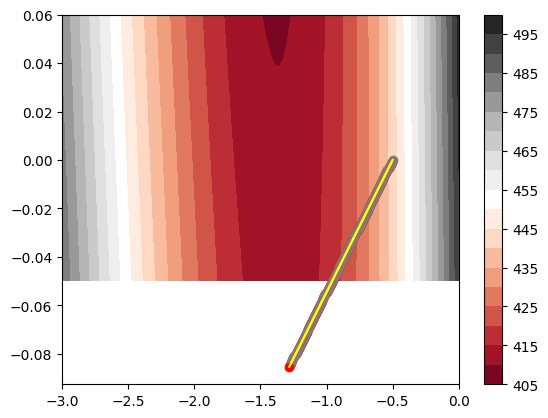

In [37]:
starting_point = np.array([-0.5, 0.00, 0.0012])
learning_rate = 0.0001
iterations = 100
gradient_descent_process(starting_point, learning_rate, iterations)

We can observe that it is not moving in the perpendicular direction of the contour

In [43]:
x = np.linspace(-3, 0.3, 100)
y = np.linspace(-0.1, 1.5, 100)
X, Y = np.meshgrid(x, y)

n_layers = 30
z = np.linspace(-0.1, 0.1, n_layers)

id = 0
import os
import shutil
if (os.path.exists('./loss_graphs')):
    shutil.rmtree('./loss_graphs')
os.makedirs('./loss_graphs')
for z_value in z:
    Z = [[func.value(x, y, z_value) for x in x] for y in y]

    plt.contourf(X, Y, Z, 50, cmap = 'RdGy')
    # always fix the colorbar to start from 360
    plt.colorbar()
    plt.title('z = {z}'.format(z = z_value))
    plt.savefig('./loss_graphs/loss_{z}.png'.format(z = id))
    plt.clf()
    id += 1
# plt.contourf(X, Y, Z, 20, cmap = 'RdGy')
# plt.colorbar()
# save all images in ./loss_graphs as a gif
import imageio
import os
images = []
for i in range(n_layers):
    images.append(imageio.imread('./loss_graphs/' + 'loss_{id}.png'.format(id = i)))
imageio.mimsave('./titanic-loss-normalized.gif', images)
shutil.rmtree('./loss_graphs')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3200\2175544069.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('./loss_graphs/' + 'loss_{id}.png'.format(id = i)))


<Figure size 640x480 with 0 Axes>

Iteration 0
Current point: [-0.5  0.  -0.1]
Gradient: [67.51769328  2.20925533 -5.50187465]
Loss value: 441.8695698493082
Accuracy: 0.5938375350140056
Iteration 1
Current point: [-0.56751769 -0.00220926 -0.09449813]
Gradient: [ 61.06443259  -0.15390966 -11.6466802 ]
Loss value: 437.4799899545486
Accuracy: 0.5938375350140056
Iteration 2
Current point: [-0.62858213 -0.00205535 -0.08285145]
Gradient: [ 56.08651583  -1.7854634  -15.86270721]
Loss value: 433.74310004594656
Accuracy: 0.5938375350140056
Iteration 3
Current point: [-6.84668642e-01 -2.69882276e-04 -6.69887379e-02]
Gradient: [ 52.15836507  -2.90071774 -18.71709378]
Loss value: 430.4292913177563
Accuracy: 0.5938375350140056
Iteration 4
Current point: [-0.73682701  0.00263084 -0.04827164]
Gradient: [ 48.98724451  -3.64865375 -20.60259154]
Loss value: 427.4141225073379
Accuracy: 0.5938375350140056
Iteration 5
Current point: [-0.78581425  0.00627949 -0.02766905]
Gradient: [ 46.36904152  -4.13370097 -21.79470526]
Loss value: 424.6276

array([-2.28725467,  0.08746149,  0.95240734])

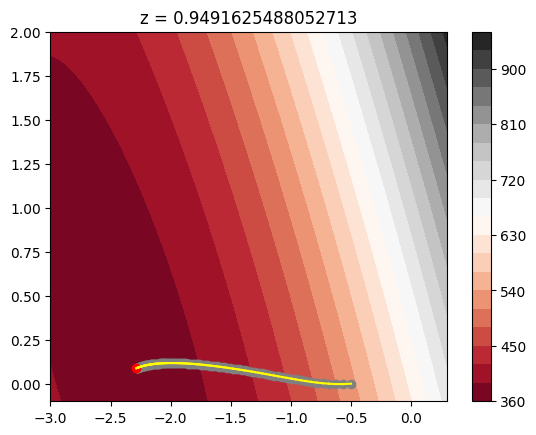

In [49]:
def gradient_descent_process(starting_point, learning_rate, iterations):

    # clear the graphs folder
    import os
    import shutil
    shutil.rmtree('./graphs')
    os.mkdir('./graphs')

    x = np.linspace(-3, 0.3, 100)
    y = np.linspace(-0.1, 2, 100)
    X, Y = np.meshgrid(x, y)

    cur_point = starting_point
    history = []
    for i in range(iterations):
        plt.clf()
        Z = [[func.value(x, y, cur_point[2]) for x in x] for y in y]
        plt.contourf(X, Y, Z, 20, cmap = 'RdGy')
        plt.title('z = {z}'.format(z = cur_point[2]))
        plt.colorbar()
        
        gradient = func.derivative(cur_point[0], cur_point[1], cur_point[2])
        print("Iteration {id}".format(id = i))
        print("Current point: {point}".format(point = cur_point))
        print("Gradient: {grad}".format(grad = gradient))
        print("Loss value: {loss}".format(loss = func.value(cur_point[0], cur_point[1], cur_point[2])))
        print("Accuracy: {acc}".format(acc = func.accuracy(cur_point[0], cur_point[1], cur_point[2])))
        print("====================================")
        next_point = cur_point - gradient * learning_rate
        # plot the history of the points as gray, the current point as red
        history.append(cur_point)
        for point in history:
            plt.scatter(point[0], point[1], c = 'grey')
        plt.scatter(next_point[0], next_point[1], c = 'red')
        #plot the line between points in history
        for i in range(len(history) - 1):
            plt.plot([history[i][0], history[i + 1][0]], [history[i][1], history[i + 1][1]], c = 'yellow')
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]], c = 'yellow')
        
        plt.savefig('./graphs/iteration_{id}.png'.format(id = i))

        cur_point = next_point

        if (np.linalg.norm(gradient) < 0.00001):
            break

    return cur_point

starting_point = np.array([-0.5, 0.00, -0.1])
learning_rate = 0.001
iterations = 100
gradient_descent_process(starting_point, learning_rate, iterations)